In [4]:
import pandas as pd 
import numpy as np 
import matplotlib as plt

from pandas import DataFrame
from functools import reduce
import datetime

!mkdir covidimages
imagedir = './covidimages/'


mkdir: cannot create directory ‘covidimages’: File exists


In [5]:
# grab the latest data... 
!   rm us-counties.csv*
!wget 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'


--2020-05-07 22:40:21--  https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.192.133, 151.101.128.133, 151.101.64.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.192.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4745409 (4.5M) [text/plain]
Saving to: ‘us-counties.csv’

us-counties.csv     100%[===================>]   4.53M  --.-KB/s    in 0.1s    

2020-05-07 22:40:21 (39.7 MB/s) - ‘us-counties.csv’ saved [4745409/4745409]



In [6]:
# pull it into a matrix
covids = pd.read_csv("us-counties.csv")
covids.shape

(121043, 6)

In [11]:
# Make it searchable
df = DataFrame(covids, 
               columns = ['date', 
                          'county', 
                          'state', 
                          'cases', 
                          'deaths'])

df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [12]:
############################
# make transformations like running average
def add_running_avg(mydf,colnum,colname):
    #return mydf
    for i in range(0,mydf.shape[0]-2):
        #print (df.iloc[i,1] + " " +     df.iloc[i+1,1])
        
      
        # currently 3, change in both places below 
        mydf.loc[mydf.index[i+2],colname] = np.round((
             ( mydf.iloc[i,colnum] + mydf.iloc[i+1,colnum] + mydf.iloc[i+2,colnum]) /3),1)
#        print (mydf.head())
#        print (list(mydf))
        
    return mydf

########################################
#for i in range(0,df.shape[0]-2):
#    df.loc[df.index[i+2],'SMA_3'] = np.round(((df.iloc[i,1]+ df.iloc[i+1,1] +df.iloc[i+2,1])/3),1)

In [13]:
def new_running_avg(mydf,srcname,depth,outcolumn):
    # 
    #   select_county = new_running_avg(select_county,'deaths',4,'SMA_3')
     
    # don't bump into the end of the list, so adjut by depth. 
    # at n, we take an average of the lines fropm ne to n+ depth and leaves
    # the averate at n+depth
    for i in range(0,mydf.shape[0]-(depth-1)):
        # get this and the next depth records
        df2 = df1.iloc[i:i+(depth-1)]
        #print(outcolumn,df2.head())
       
        # get the total of that column
        total = reduce(lambda x, y: x + y, df2[srcname])

        mydf.loc[mydf.index[i + (depth-1) ],outcolumn] = np.round(
             ( total / depth),1)
    return mydf

/usr/lib/python3/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Full California
3061


/home/rca/.local/lib/python3.6/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/rca/.local/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

Full Colorado
2672


/home/rca/.local/lib/python3.6/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/rca/.local/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

Full Florida
3254


/home/rca/.local/lib/python3.6/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/rca/.local/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/rca/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure

Full Michigan
3447


/home/rca/.local/lib/python3.6/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/rca/.local/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/rca/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure

Full Oregon
1480


/home/rca/.local/lib/python3.6/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/rca/.local/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/rca/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure

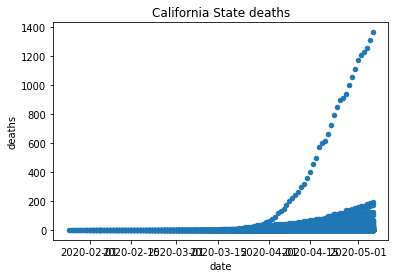

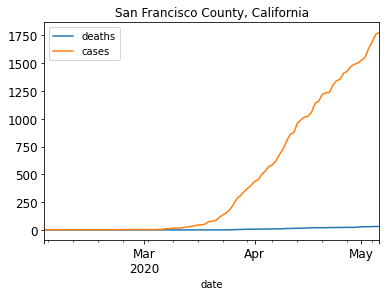

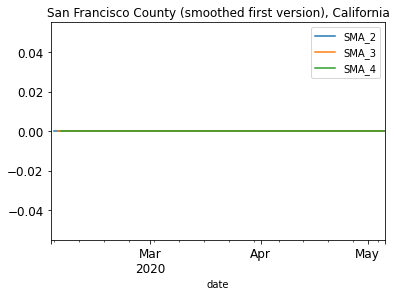

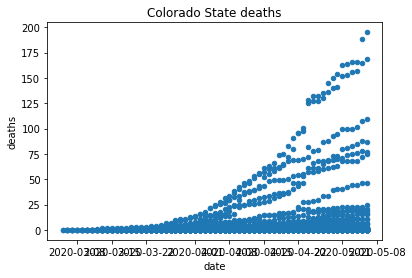

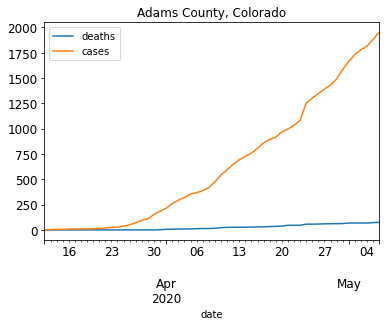

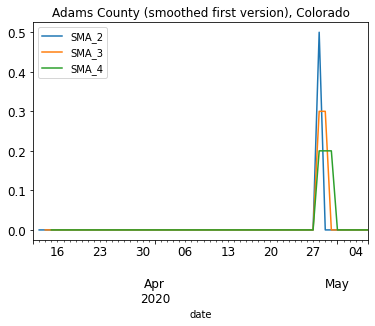

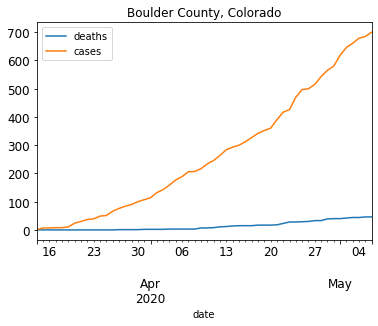

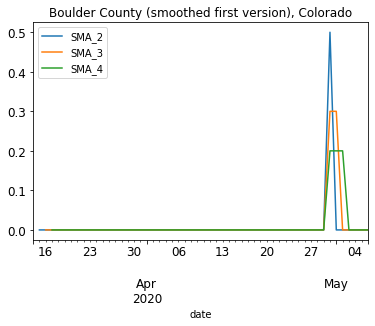

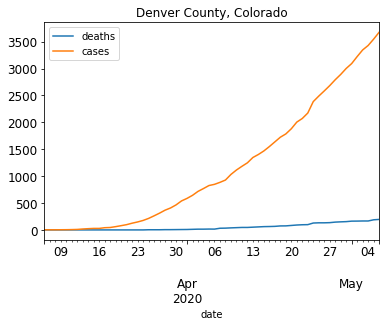

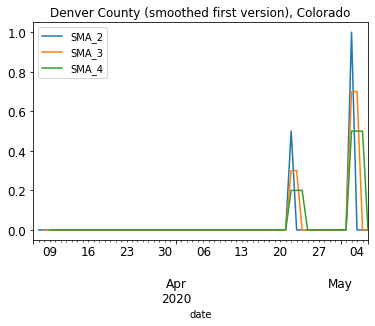

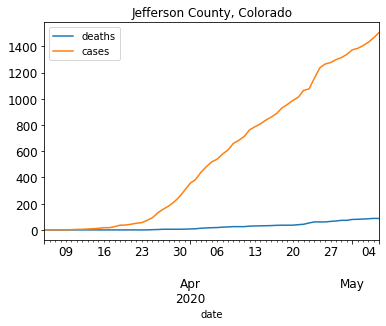

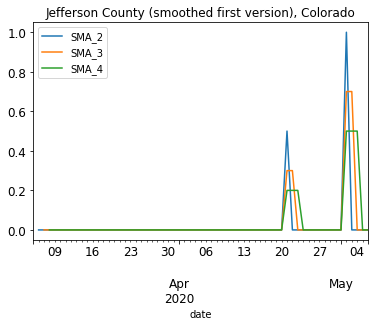

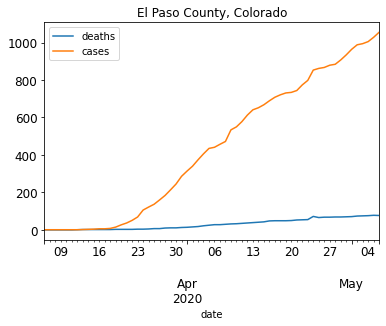

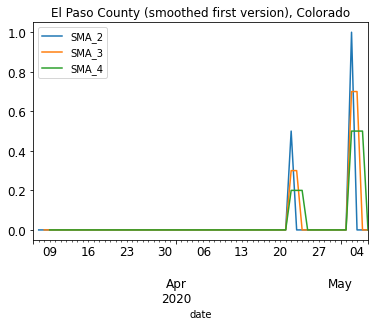

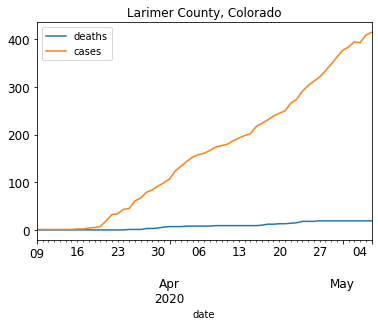

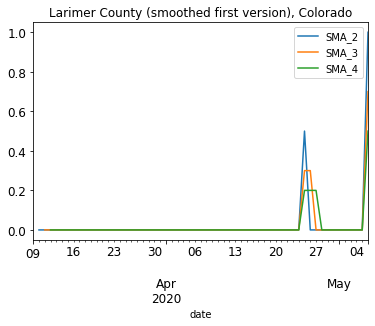

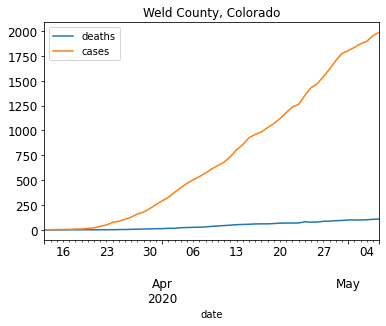

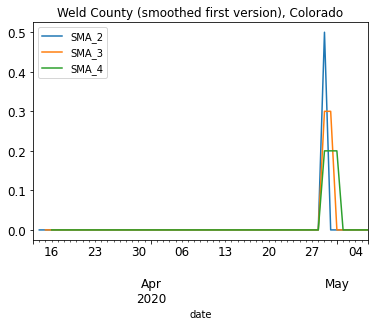

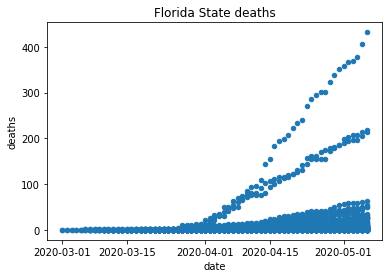

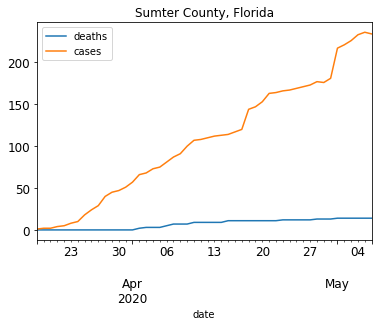

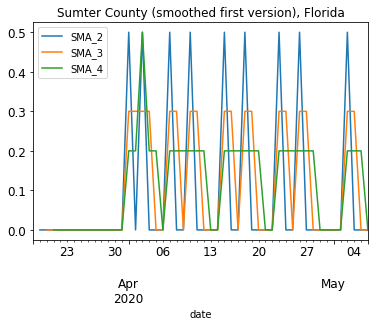

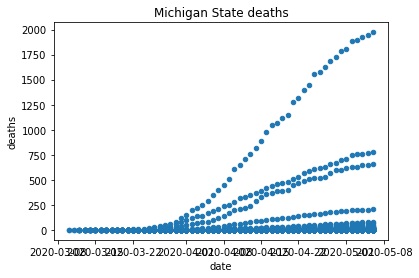

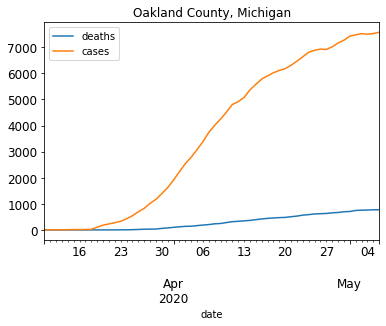

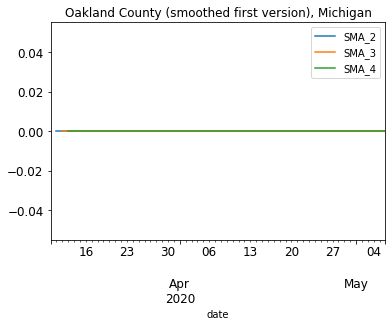

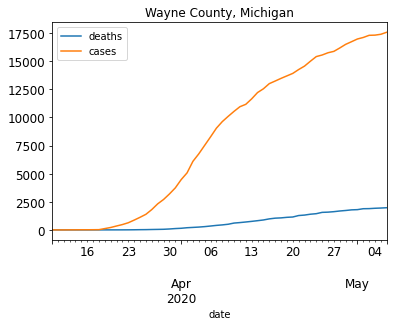

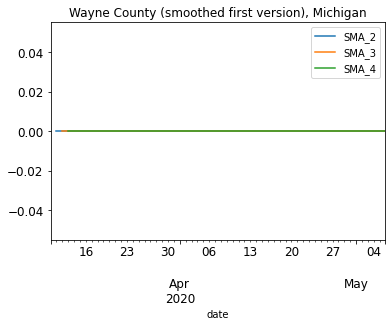

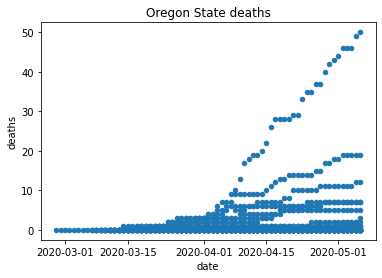

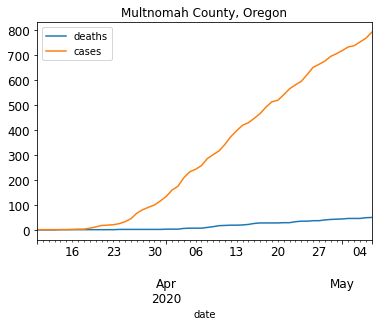

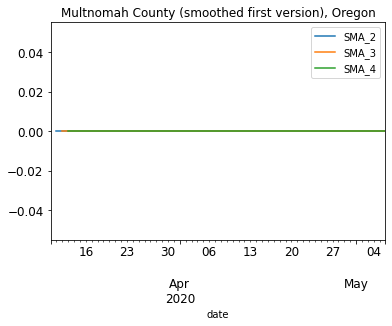

In [15]:
# added states because of ambiguous Jefferson and Wayne
counties = [
    ['San Francisco','California'],
    ['Adams','Colorado'],
    ['Boulder','Colorado'],
    ['Denver','Colorado'],
    ['Jefferson','Colorado'],
    ['El Paso','Colorado'],
    ['Larimer','Colorado'],
    ['Weld','Colorado'],
    ['Sumter','Florida'],
    ['Oakland','Michigan'],
    ['Wayne','Michigan'],
    ['Multnomah','Oregon']
]
count = 0
states = {}

for county, state in counties:
    #Select by state.

    df1= df.loc[df['state'] == state ]
    df1['date'] = pd.to_datetime(df1['date'], errors='coerce')

    if (state not in states):
        print ("Full " + state)
        print (df1.shape[0])
        states[state] = 1
        count = count + 1

        fig1 = df1.plot(x='date',
            kind='scatter',
            y='deaths',
            title=state + " State deaths").get_figure()
        fig1.savefig(imagedir + state + ".png")


    # this grabs only the ones that have the county field set to the 
    # value of county variable
    select_county = df1.loc[df1['county'] == county ]
    
    select_county = new_running_avg(select_county,'deaths',2,'SMA_2')
    select_county = new_running_avg(select_county,'deaths',3,'SMA_3')
    select_county = new_running_avg(select_county,'deaths',4,'SMA_4')
#    print("new1",select_county.head())
    
    select_county = add_running_avg(select_county,4,'SMA_3a')
#    print("new2\n",select_county.head())

    fig2 = select_county.plot(x='date',
                       y=['deaths','cases'],
                       fontsize=12,
                       title=county + " County, " + state).get_figure()
    fig2.savefig(imagedir + state + "_" + county + "deaths" + ".png")
    
    fig3 = select_county.plot(x='date',
                       y=['SMA_2','SMA_3','SMA_4'],
                       fontsize=12,
                       title=county + " County (smoothed first version), " + state).get_figure()
    fig3.savefig(imagedir + state + "_" + county + "deathsmooth1" + ".png")